In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Movies.csv',encoding='ISO-8859-1')
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [5]:
data.shape

(15509, 10)

In [6]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [7]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [9]:
data.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [10]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [11]:
data.dropna(inplace= True)

In [12]:
data.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [14]:
data.duplicated().sum()

0

In [15]:
data['Name']

1        #Gadhvi (He thought he was Gandhi)
3                                   #Yaaram
5                      ...Aur Pyaar Ho Gaya
6                                 ...Yahaan
8                        ?: A Question Mark
                        ...                
15493                                Zubaan
15494                              Zubeidaa
15503                       Zulm Ki Zanjeer
15505                                 Zulmi
15508                          Zulm-O-Sitam
Name: Name, Length: 5659, dtype: object

In [16]:
data['Votes']

1            8
3           35
5          827
6        1,086
8          326
         ...  
15493      408
15494    1,496
15503       44
15505      655
15508       20
Name: Votes, Length: 5659, dtype: object

In [17]:
data['Rating']

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64

In [18]:
data['Year'] = data['Year'].str.strip('()').astype(int)
data['Votes'] = data['Votes'].str.replace(',', '').astype(int)
data['Duration'] = data['Duration'].str.replace('min', '').astype(int)

In [19]:
data.describe()

,Year,Duration,Rating,Votes
count,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585
std,19.741839,25.319939,1.381165,13651.503584
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,119.000000,5.000000,30.000000
50%,2002.000000,135.000000,6.100000,131.000000
75%,2013.000000,150.000000,6.900000,922.500000
max,2021.000000,321.000000,10.000000,591417.000000


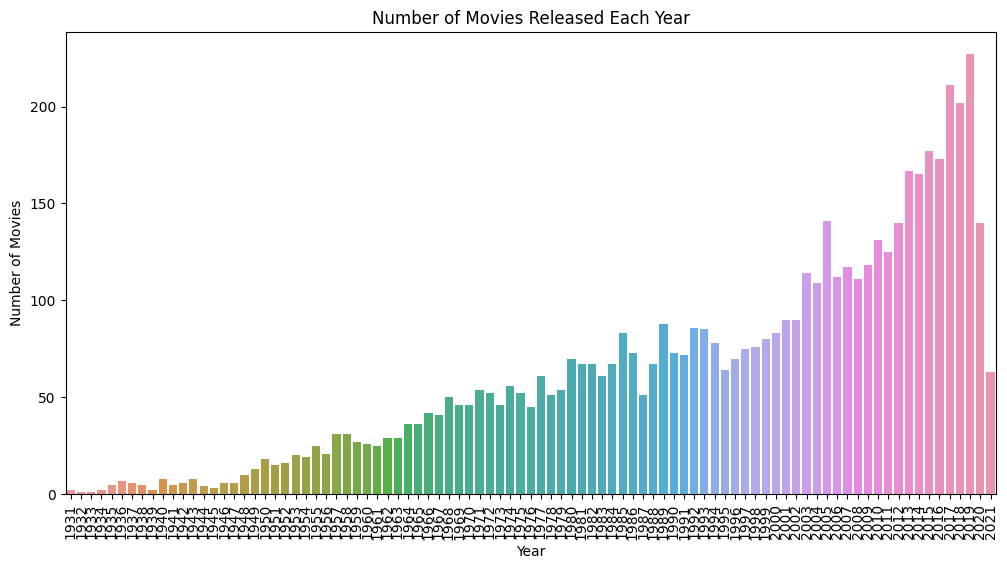

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=90)
plt.show()

In [21]:
data.groupby('Name')['Rating'].mean().sort_values(ascending= False).head(30)

Name
Love Qubool Hai                                                         10.0
Half Songs                                                               9.7
The Reluctant Crime                                                      9.4
Gho Gho Rani                                                             9.4
June                                                                     9.4
Refl3ct                                                                  9.3
Baikunth                                                                 9.3
Sindhustan                                                               9.3
Ashok Vatika                                                             9.3
Love Sorries                                                             9.3
God of gods                                                              9.3
Secrets of Sinauli                                                       9.3
The Flip Side: A Truth That Could Not Reach You                        

In [22]:
data.groupby('Name')['Rating'].count().sort_values(ascending= False).head(30)

Name
Guru            4
Baazi           4
Zindagi         4
Badal           3
Andaz           3
Elaan           3
Chori Chori     3
Raaz            3
Blackmail       3
Himmatwala      3
Hulchul         3
Mr. X           3
Mela            3
Sanjog          3
Maa             3
Coolie No. 1    3
Ittefaq         3
Hum Dono        3
Anari           3
Dushman         3
Devdas          3
Game            3
Haqeeqat        3
Fashion         2
Adalat          2
Saazish         2
Ishaara         2
Fate            2
Fareb           2
Saaya           2
Name: Rating, dtype: int64

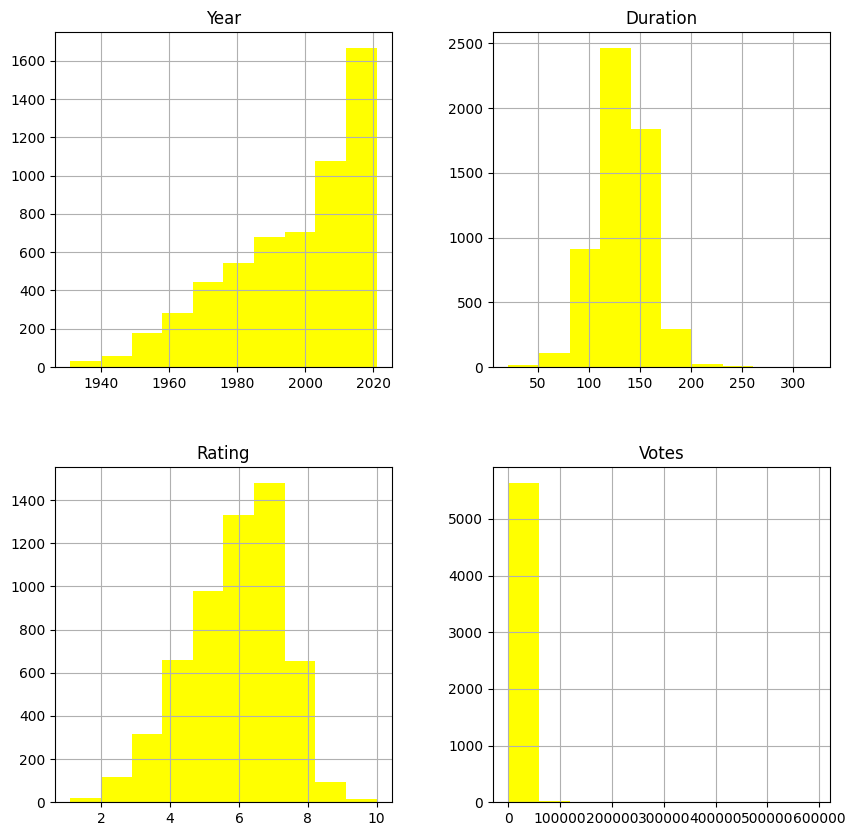

In [23]:
data.hist(figsize=(10, 10), color= 'yellow')
None

In [24]:
data['Genre'] = data['Genre'].str.split(', ')
genre = data.explode('Genre')
counts = genre['Genre'].value_counts().reset_index()
counts.columns = ['Genre', 'Count']
mean = genre.groupby('Genre')['Rating'].mean().reset_index()
mean.columns = ['Genre', 'Mean Rating']
df = pd.merge(counts, mean, on='Genre')
print(df)

          Genre  Count  Mean Rating
0         Drama   3796     6.056744
1        Action   1686     5.520463
2       Romance   1380     5.811087
3        Comedy   1344     5.751042
4         Crime    875     5.820114
5      Thriller    679     5.630044
6        Family    416     6.323317
7       Musical    412     6.246845
8       Mystery    304     5.867763
9     Adventure    277     5.879422
10       Horror    202     4.817327
11      Fantasy    146     5.808219
12    Biography    115     6.737391
13      History     99     6.905051
14        Music     53     6.071698
15  Documentary     48     7.608333
16        Sport     40     6.515000
17    Animation     40     6.072500
18          War     33     5.981818
19       Sci-Fi     32     5.253125
20         News      1     8.000000
21      Western      1     5.700000


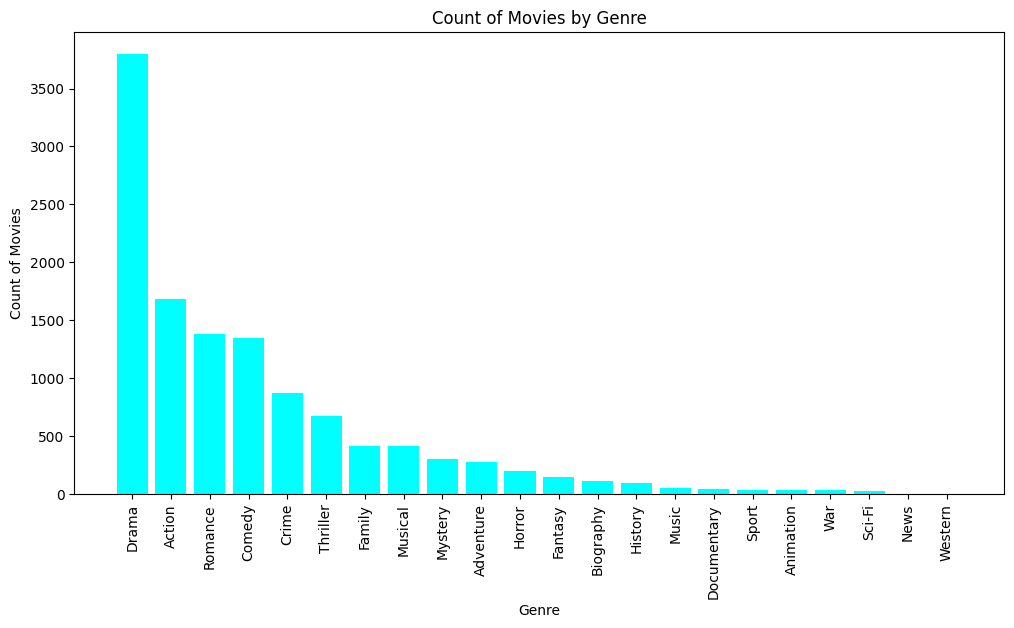

In [25]:
DataFrame = df.sort_values(by='Count', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(df['Genre'], df['Count'],color='cyan')
plt.xlabel('Genre')
plt.ylabel('Count of Movies')
plt.title('Count of Movies by Genre')
plt.xticks(rotation=90)
plt.show()

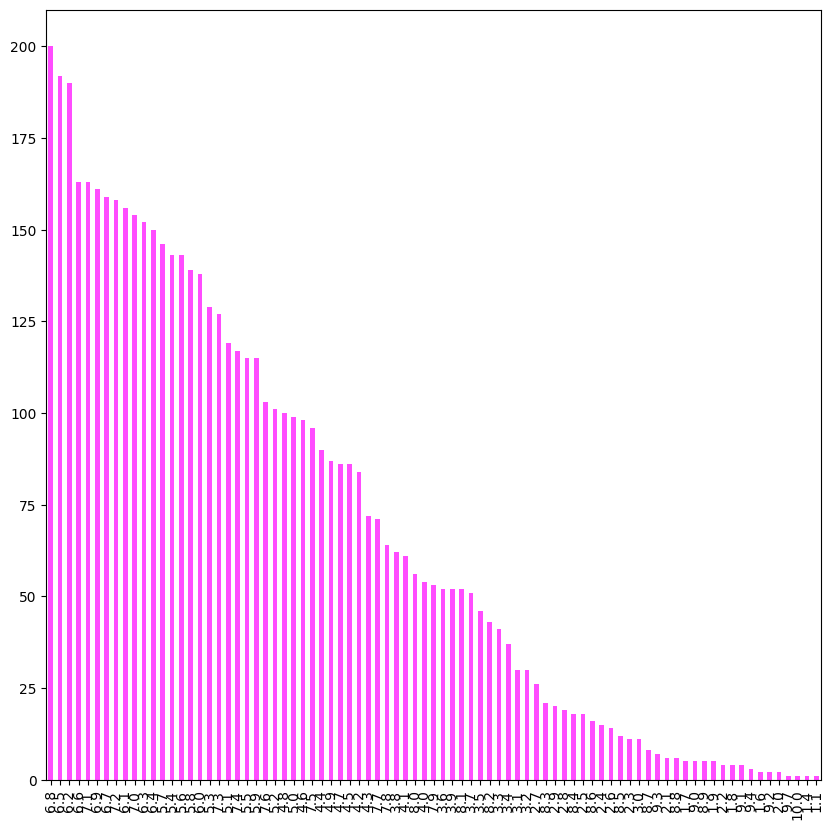

In [26]:
data['Rating'].value_counts().plot(kind='bar',alpha=.7,figsize=(10,10),color='magenta')
plt.show()

In [27]:
acts1 = data['Actor 1'].value_counts().sort_values(ascending=False).head(10)
acts1

Amitabh Bachchan      104
Mithun Chakraborty     93
Ashok Kumar            91
Dharmendra             90
Jeetendra              89
Akshay Kumar           82
Shashi Kapoor          81
Rajesh Khanna          74
Ajay Devgn             70
Sanjay Dutt            61
Name: Actor 1, dtype: int64

In [28]:
acts2 = data['Actor 2'].value_counts().sort_values(ascending=False).head(10)
acts2

Rekha                 52
Hema Malini           48
Mithun Chakraborty    38
Dharmendra            38
Akshay Kumar          34
Juhi Chawla           34
Sharmila Tagore       32
Shabana Azmi          31
Raveena Tandon        28
Sunil Shetty          28
Name: Actor 2, dtype: int64

In [29]:
acts3 = data['Actor 3'].value_counts().sort_values(ascending=False).head(10)
acts3

Pran                  57
Anupam Kher           51
Prem Chopra           32
Paresh Rawal          30
Mithun Chakraborty    29
Shatrughan Sinha      28
Amrish Puri           26
Om Puri               26
Asrani                26
Raj Babbar            24
Name: Actor 3, dtype: int64

In [30]:
rated_movies=data[(data['Rating']>=7)]['Actor 1'].head(20)
actor=data.groupby(rated_movies)['Rating'].mean()
actor

Actor 1
Aamir Khan             8.4
Amitabh Bachchan       7.4
Anil Kapoor            7.2
Dhruva Padmakumar      8.1
Ehan Bhat              7.4
Geeta Agrawal          7.3
Guru Dutt              7.2
Jennifer Kendal        7.5
Jimmy Sheirgill        7.4
Kalki Koechlin         7.5
Madhavan               7.3
Manoj Bajpayee         8.1
Nachiket Patwardhan    7.7
Naseeruddin Shah       7.8
Raj Nidimoru           7.3
Rajvvir Aroraa         7.3
Rasika Dugal           7.0
Sanjay Deyali          8.0
Shabana Azmi           7.1
Srishti Gautam         7.8
Name: Rating, dtype: float64

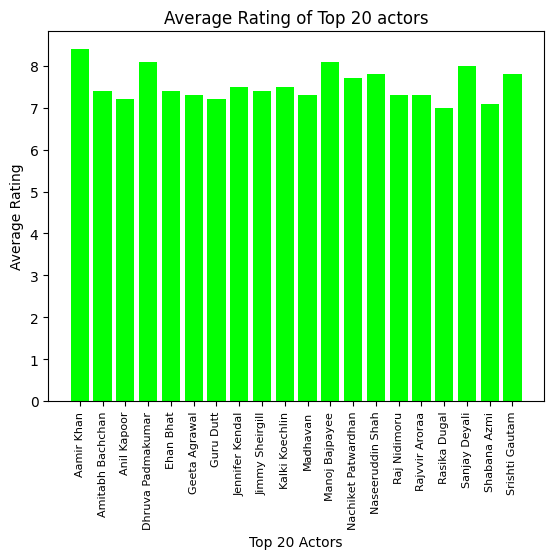

In [31]:
plt.bar(actor.index,actor.values,color='lime')
plt.xlabel("Top 20 Actors")
plt.ylabel("Average Rating")
plt.title("Average Rating of Top 20 actors")
plt.xticks(rotation='vertical', fontsize=8)
plt.show()

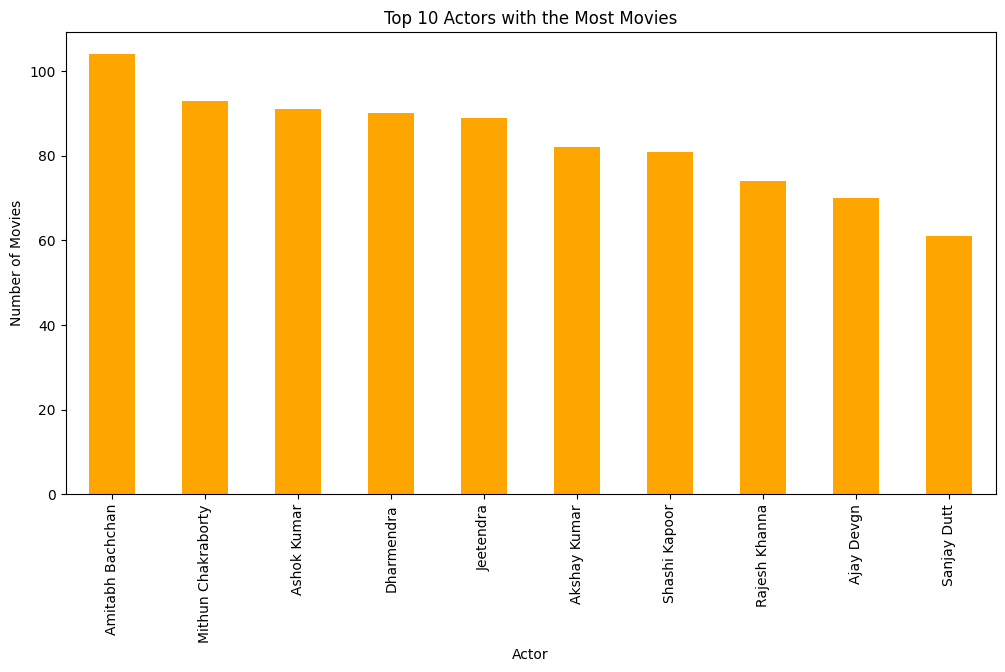

In [32]:
plt.figure(figsize=(12, 6))
top_actors = data['Actor 1'].value_counts().sort_values(ascending=False).head(10)
top_actors.plot(kind='bar',color='orange')
plt.title('Top 10 Actors with the Most Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

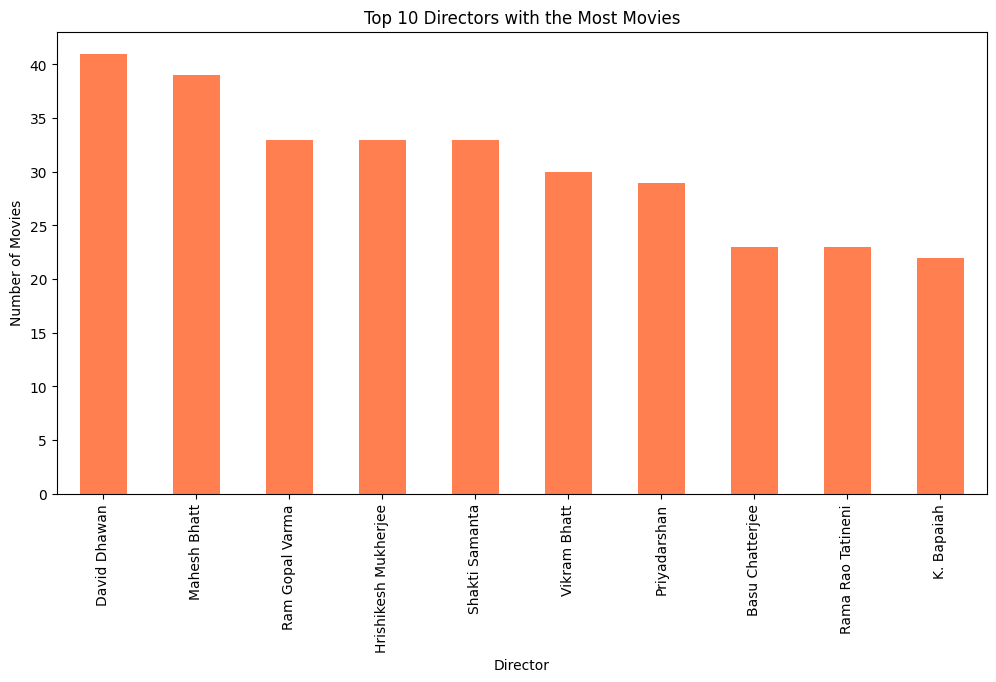

In [33]:
plt.figure(figsize=(12, 6))
top_directors = data['Director'].value_counts().sort_values(ascending=False).head(10)
top_directors.plot(kind='bar',color='coral')
plt.title('Top 10 Directors with the Most Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

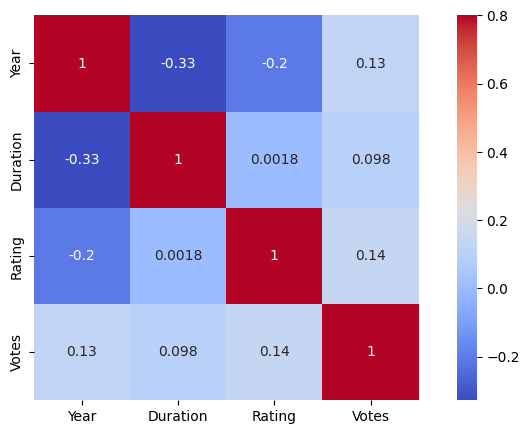

In [34]:
corrmat = data.corr()
fig = plt.figure(figsize = (10, 5))
sns.heatmap(corrmat, vmax = .8, square = True, annot = True,cmap="coolwarm")
plt.show()

In [35]:
director_mean_rating = data.groupby('Director')['Rating'].transform('mean')
data['Director_encoded'] = director_mean_rating
actor1_mean_rating = data.groupby('Actor 1')['Rating'].transform('mean')
data['Actor1_encoded'] = actor1_mean_rating
actor2_mean_rating = data.groupby('Actor 2')['Rating'].transform('mean')
data['Actor2_encoded'] = actor2_mean_rating
actor3_mean_rating = data.groupby('Actor 3')['Rating'].transform('mean')
data['Actor3_encoded'] = actor3_mean_rating

In [36]:
X = data[[ 'Year', 'Votes', 'Duration','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = data['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

In [37]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [38]:
print('Logistic Regression Model Performance: ')
print('Mean squared error: ',mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr_pred))
print('R2 score: ',r2_score(y_test, lr_pred))

Logistic Regression Model Performance: 
Mean squared error:  0.39354804114708
Mean absolute error:  0.45838202331733446
R2 score:  0.7919547134060192


In [39]:
print('Random Forest Regressor Model Performance: ')
print('Mean squared error: ',mean_squared_error(y_test, rf_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rf_pred))
print('R2 score: ',r2_score(y_test, rf_pred))

Random Forest Regressor Model Performance: 
Mean squared error:  0.3169870800942285
Mean absolute error:  0.3784369846878681
R2 score:  0.8324279096077462


In [40]:
top_movies = data['Name'].value_counts().sort_values(ascending=False).head(20)
top_movies

Baazi           4
Guru            4
Zindagi         4
Himmatwala      3
Badal           3
Game            3
Coolie No. 1    3
Hum Dono        3
Elaan           3
Haqeeqat        3
Dushman         3
Devdas          3
Anari           3
Raaz            3
Sanjog          3
Chori Chori     3
Mr. X           3
Maa             3
Mela            3
Hulchul         3
Name: Name, dtype: int64

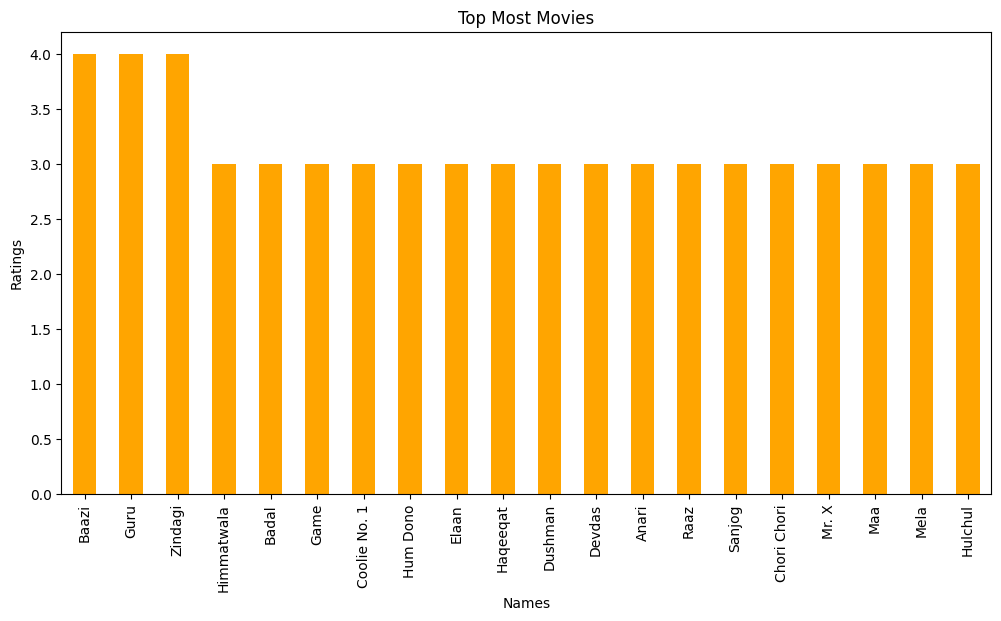

In [42]:
plt.figure(figsize=(12, 6))
top_actors = data['Name'].value_counts().sort_values(ascending=False).head(20)
top_actors.plot(kind='bar',color='orange')
plt.title('Top Most Movies')
plt.xlabel('Names')
plt.ylabel('Ratings')
plt.xticks(rotation=90)
plt.show()